In [14]:
import shap
from shap.datasets import iris
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.DataFrame( data ={
    "Known_python" : np.random.choice([0,1],size=1000),
    "Known_GenAI" : np.random.choice([0,1],size=1000)}
)

In [4]:
df.head

<bound method NDFrame.head of      Known_python  Known_GenAI
0               1            1
1               1            0
2               1            0
3               0            1
4               0            0
..            ...          ...
995             1            1
996             0            0
997             0            1
998             0            0
999             1            0

[1000 rows x 2 columns]>

In [5]:
df.shape

(1000, 2)

In [8]:
df["Placement"] = df.any(axis=1).astype(int)
df.head()

,Known_python,Known_GenAI,Placement
0,1,1,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0


## Train Model

In [11]:
X = df.drop(columns=["Placement"])
y = df["Placement"]
X

,Known_python,Known_GenAI
0,1,1
1,1,0
2,1,0
3,0,1
4,0,0
...,...,...
995,1,1
996,0,0
997,0,1
998,0,0


In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)


In [13]:
X_train.shape,X_test.shape

((800, 2), (200, 2))

In [15]:
gb = GradientBoostingClassifier(n_estimators=10,learning_rate=0.05,random_state=42)

In [16]:
gb.fit(X_train,y_train)

,loss,'log_loss'
,learning_rate,0.05
,n_estimators,10
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [20]:
y_train_pred = gb.predict(X_train)
y_test_pred = gb.predict(X_test)

In [21]:
print(f"train accuracy :{accuracy_score(y_train,y_train_pred)}")
print(f"test accuracy :{accuracy_score(y_test,y_test_pred)}")

train accuracy :1.0
test accuracy :1.0


## Apply SHAP on DATASET

In [22]:
background_data = X_train

In [24]:
X_test

,Known_python,Known_GenAI
948,1,1
699,1,0
176,0,0
322,1,0
34,1,0
...,...,...
765,1,1
210,1,1
392,1,0
467,0,1


In [29]:
row1 = X_test.loc[[948],:]
row2 = X_test.loc[[699] ,:]
row3 = X_test.loc[[176] ,:]
row4 = X_test.loc[[467],:]



In [33]:
print(f"{row1}\n,{row2}\n,{row3}\n,{row4}")

     Known_python  Known_GenAI
948             1            1
,     Known_python  Known_GenAI
699             1            0
,     Known_python  Known_GenAI
176             0            0
,     Known_python  Known_GenAI
467             0            1


In [34]:
row_list = [row1,row2,row3,row4]
row_list

[     Known_python  Known_GenAI
 948             1            1,
      Known_python  Known_GenAI
 699             1            0,
      Known_python  Known_GenAI
 176             0            0,
      Known_python  Known_GenAI
 467             0            1]

In [35]:
#Make the explainer
explainer = shap.TreeExplainer(model=gb,data = background_data,model_output="probability")

In [37]:
#base value
explainer.expected_value

np.float64(0.7575687333376524)

In [39]:
shap_value = explainer(row1)
shap_value  #Explaination

.values =
array([[0.04638939, 0.04638939]])

.base_values =
array([0.75756873])

.data =
array([[1, 1]])

In [40]:
display(row1)
print()
print(f"Row Prediction :{gb.predict(row1).item()}")
print(f"Row Prediction : {gb.predict_proba(row1).item(1)}")
print()
print(f"Base Values:{shap_value.base_values.item()}")
print(f"Shap_values (known_python,known_genai) : {shap_value.values.ravel()}")

,Known_python,Known_GenAI
948,1,1



Row Prediction :1
Row Prediction : 0.8503475229935112

Base Values:0.7575687333376524
Shap_values (known_python,known_genai) : [0.04638939 0.04638939]


In [46]:
type(shap_value[0])

shap._explanation.Explanation

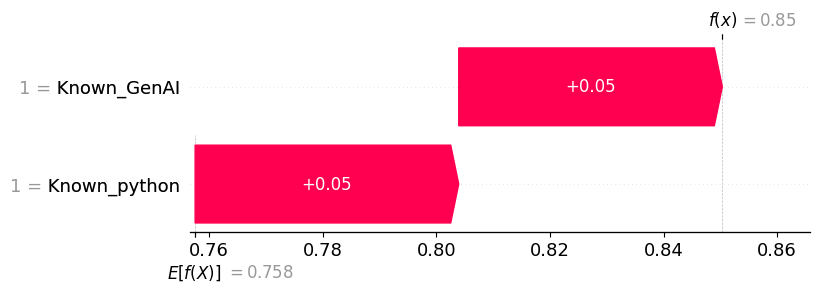

In [47]:
shap.waterfall_plot(shap_value[0])

In [ ]:
def calculate_and_plot_shap(background_data,test_case):
    
    explainer = shap.TreeExplainer(model=gb,data = background_data,model_output="probability")
    shap_value = explainer(test_case)
    display(test_case)
    print()
    print(f"Row Prediction :{gb.predict(test_case).item()}")
    print(f"Row Prediction : {gb.predict_proba(test_case).item(1)}")
    print()
    print(f"Base Values:{shap_value.base_values.item()}")
    print(f"Shap_values (known_python,known_genai) : {shap_value.values.ravel()}")
    shap.waterfall_plot(shap_value[0])
    

,Known_python,Known_GenAI
948,1,1



Row Prediction :1
Row Prediction : 0.8503475229935112

Base Values:0.7575687333376524
Shap_values (known_python,known_genai) : [0.04638939 0.04638939]


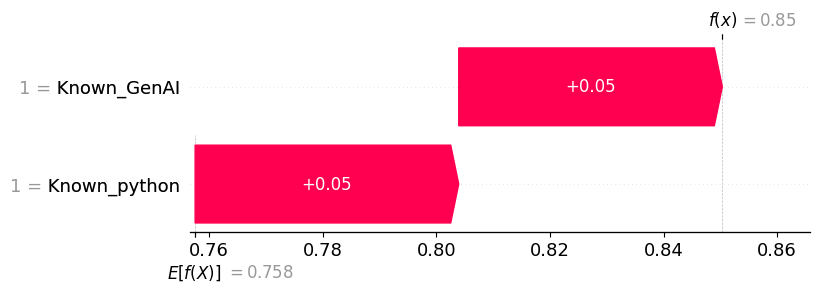

In [49]:
calculate_and_plot_shap(background_data=background_data,test_case=row1)

Row Number : {num}


,Known_python,Known_GenAI
948,1,1



Row Prediction :1
Row Prediction : 0.8503475229935112

Base Values:0.7575687333376524
Shap_values (known_python,known_genai) : [0.04638939 0.04638939]


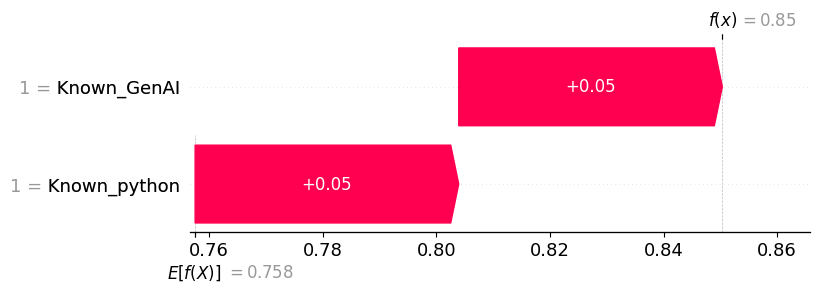



Row Number : {num}


,Known_python,Known_GenAI
699,1,0



Row Prediction :1
Row Prediction : 0.8503475229935111

Base Values:0.7575687333376524
Shap_values (known_python,known_genai) : [ 0.21467157 -0.12189278]


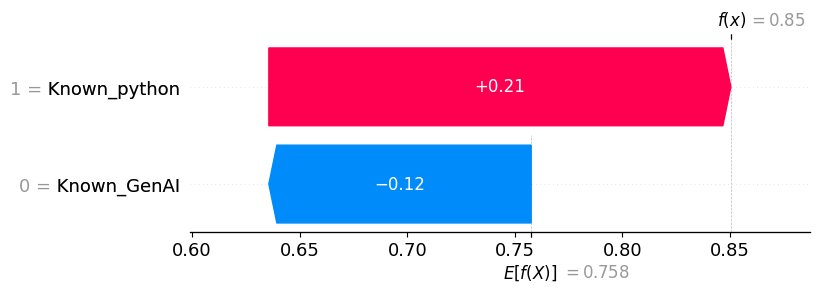



Row Number : {num}


,Known_python,Known_GenAI
176,0,0



Row Prediction :0
Row Prediction : 0.44696148101151617

Base Values:0.7575687333376524
Shap_values (known_python,known_genai) : [-0.15126976 -0.15933748]


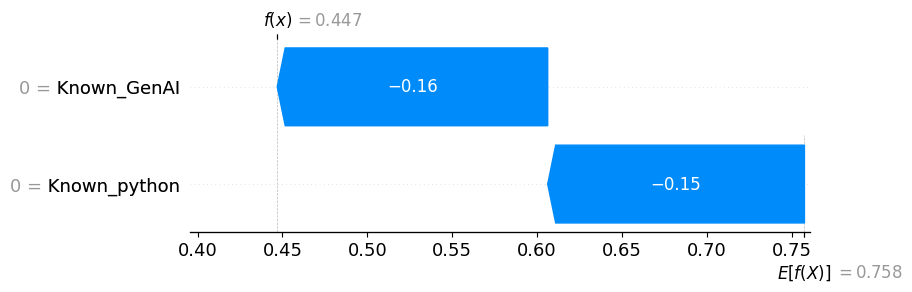



Row Number : {num}


,Known_python,Known_GenAI
467,0,1



Row Prediction :1
Row Prediction : 0.8503475229935112

Base Values:0.7575687333376524
Shap_values (known_python,known_genai) : [-0.11214136  0.20492015]


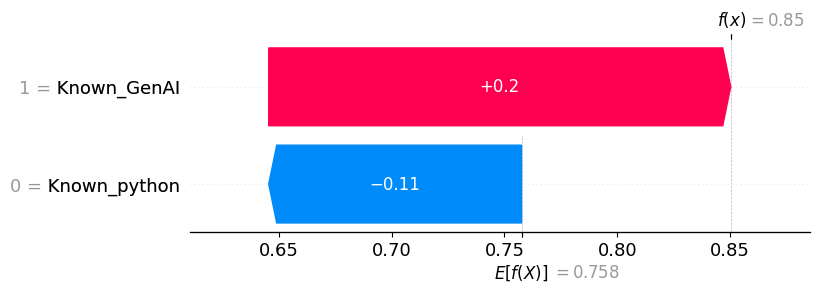

In [50]:
for num,row in enumerate(row_list,start=1):
    print("Row Number : {num}")
    calculate_and_plot_shap(background_data=background_data,test_case= row)
    print("\n")

## Only Positive Background data

In [52]:
background_data_positive = X_train.loc[y_train==1,:]

In [53]:
background_data_positive

,Known_python,Known_GenAI
99,1,1
759,1,0
270,1,1
780,0,1
334,1,1
...,...,...
275,1,1
418,1,1
473,0,1
250,1,1


Row Number : {num}


,Known_python,Known_GenAI
948,1,1



Row Prediction :1
Row Prediction : 0.8503475229935112

Base Values:0.8503475229935112
Shap_values (known_python,known_genai) : [0. 0.]


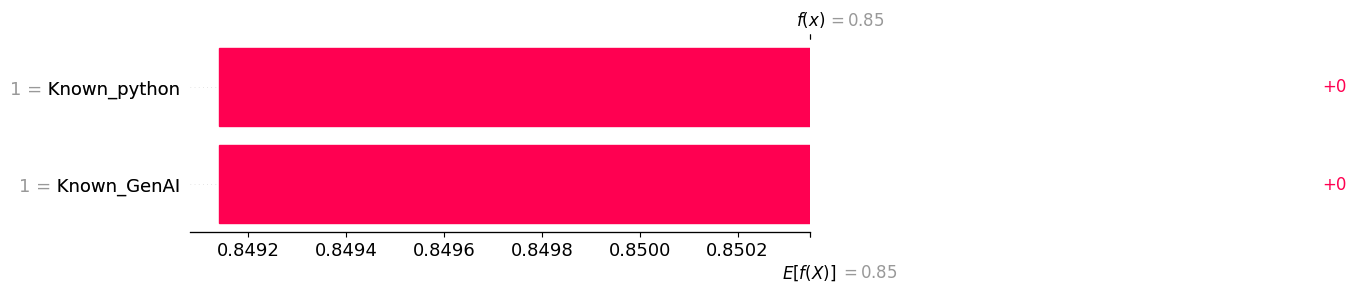



Row Number : {num}


,Known_python,Known_GenAI
699,1,0



Row Prediction :1
Row Prediction : 0.8503475229935111

Base Values:0.8503475229935112
Shap_values (known_python,known_genai) : [ 0.1706499 -0.1706499]


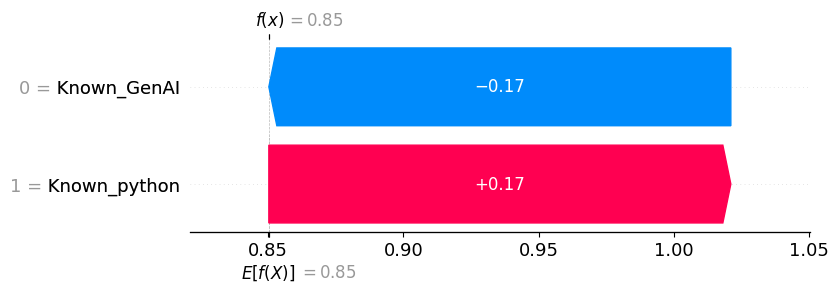



Row Number : {num}


,Known_python,Known_GenAI
176,0,0



Row Prediction :0
Row Prediction : 0.44696148101151617

Base Values:0.8503475229935112
Shap_values (known_python,known_genai) : [-0.19967609 -0.20370995]


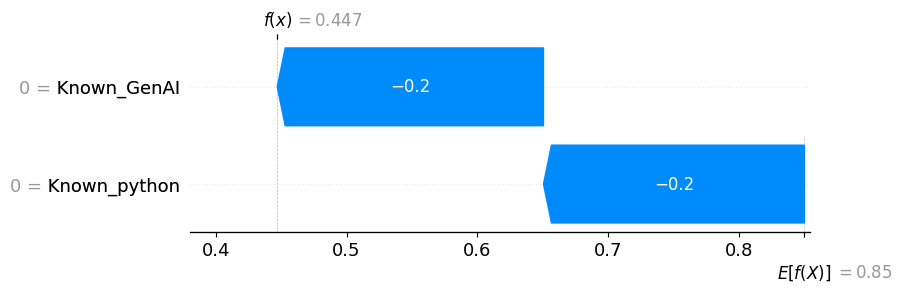



Row Number : {num}


,Known_python,Known_GenAI
467,0,1



Row Prediction :1
Row Prediction : 0.8503475229935112

Base Values:0.8503475229935112
Shap_values (known_python,known_genai) : [-0.16577418  0.16577419]


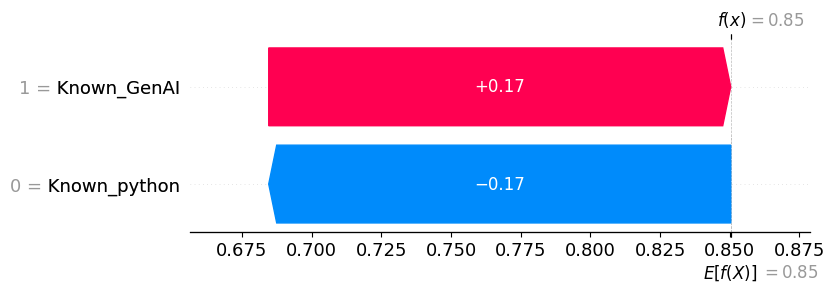

In [ ]:
for num,row in enumerate(row_list,start=1):
    print("Row Number : {num}")
    calculate_and_plot_shap(background_data=background_data_positive,test_case= row)
    print("\n")

## All Background Data Negative

In [55]:
background_data_negative = X_train.loc[y_train==0,:]
background_data_negative

,Known_python,Known_GenAI
959,0,0
991,0,0
528,0,0
957,0,0
574,0,0
...,...,...
912,0,0
485,0,0
388,0,0
102,0,0


Row Number : {num}


,Known_python,Known_GenAI
948,1,1



Row Prediction :1
Row Prediction : 0.8503475229935112

Base Values:0.446961481011516
Shap_values (known_python,known_genai) : [0.20169302 0.20169302]


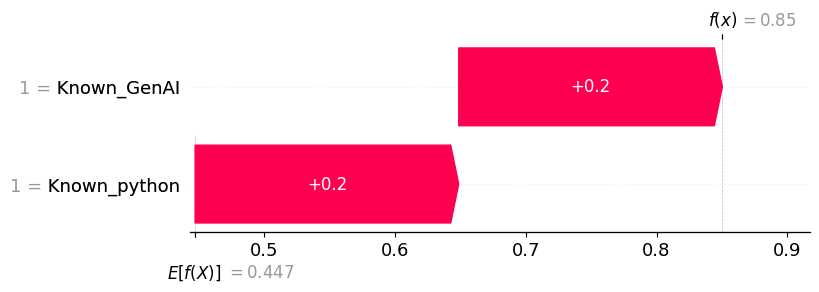



Row Number : {num}


,Known_python,Known_GenAI
699,1,0



Row Prediction :1
Row Prediction : 0.8503475229935111

Base Values:0.446961481011516
Shap_values (known_python,known_genai) : [0.40338603 0.        ]


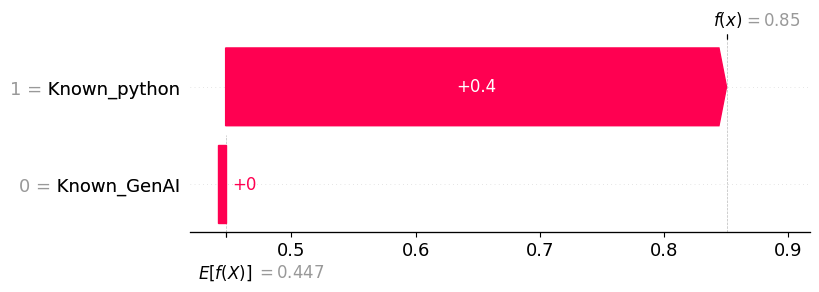



Row Number : {num}


,Known_python,Known_GenAI
176,0,0



Row Prediction :0
Row Prediction : 0.44696148101151617

Base Values:0.446961481011516
Shap_values (known_python,known_genai) : [0. 0.]


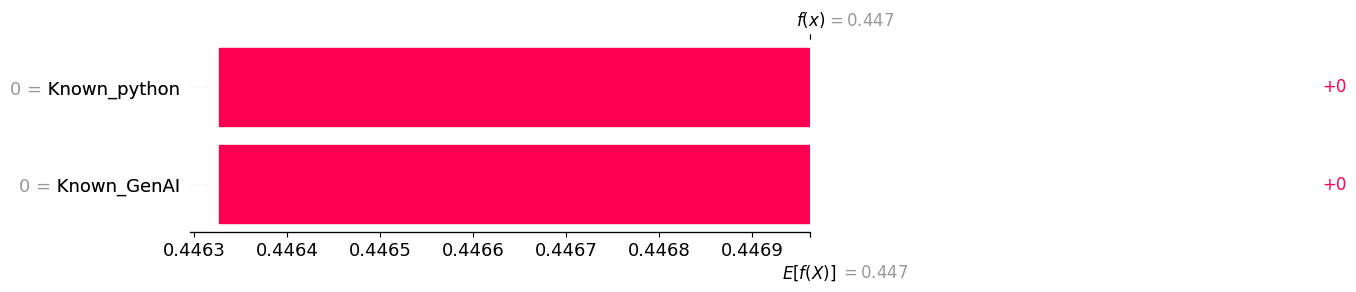



Row Number : {num}


,Known_python,Known_GenAI
467,0,1



Row Prediction :1
Row Prediction : 0.8503475229935112

Base Values:0.446961481011516
Shap_values (known_python,known_genai) : [0.         0.40338603]


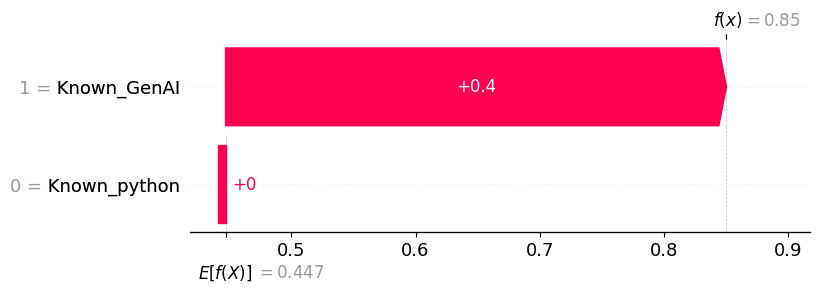

In [56]:
for num,row in enumerate(row_list,start=1):
    print("Row Number : {num}")
    calculate_and_plot_shap(background_data=background_data_negative,test_case= row)
    print("\n")